In [14]:
import os
import psutil
import helper_14_01 as helper
from multiprocess import Pool
import time

In [15]:
os.cpu_count()

8

In [16]:
psutil.cpu_count(logical=False)

8

In [17]:
with Pool(10) as p:
    res = p.map(helper.f, [1, 2, 3])
    print(res)

[1, 4, 9]


In [18]:
def sequential_execution(numbers, f):
    res = [f(num) for num in numbers]
    return res

In [19]:
%%timeit
sequential_execution([1, 2, 3], helper.f)

1.11 µs ± 8.27 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [20]:
def parallel_execution(numbers, f):
    with Pool(5) as p:
        res = p.map(f, numbers)
    return res

In [21]:
%%timeit
parallel_execution([1, 2, 3], helper.f)

29.5 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
numbers = list(range(1, 10**4))

In [35]:
print('sequential speed')
%timeit sequential_execution(numbers, helper.square_and_sum)

sequential speed
3.44 s ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


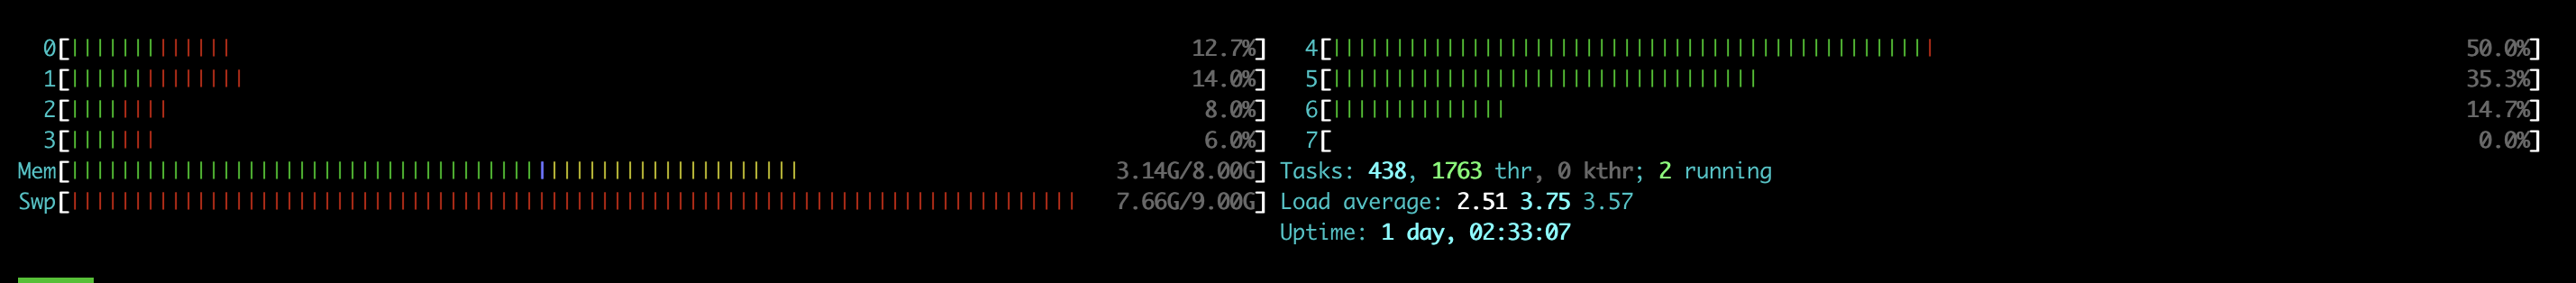

In [34]:
print('paralled speed')
%timeit parallel_execution(numbers, helper.square_and_sum)

paralled speed
974 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


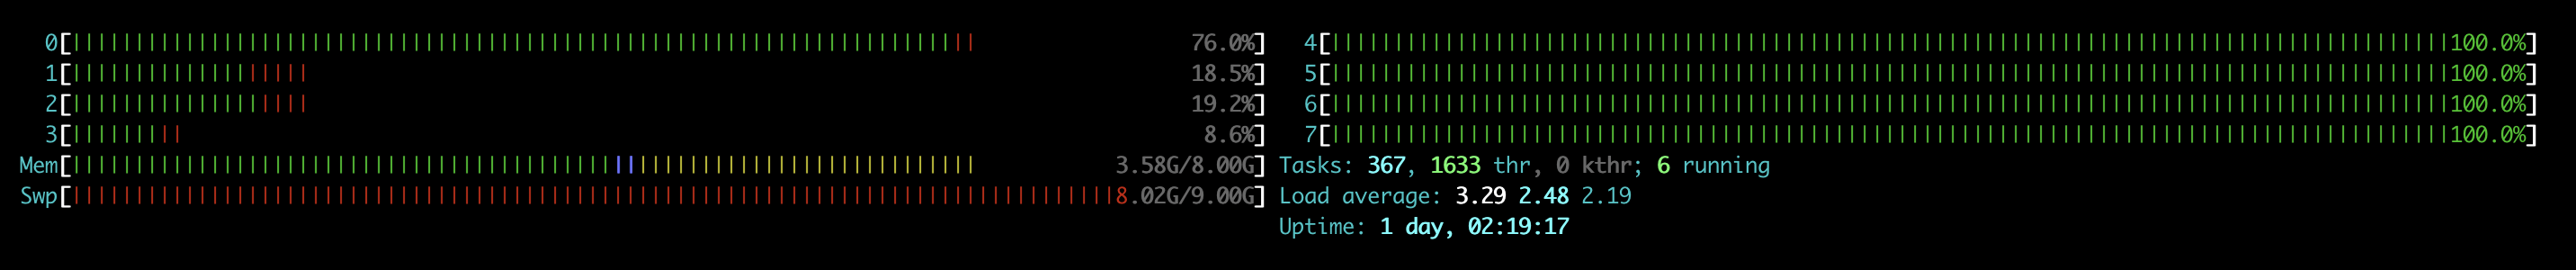